In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc as pm

You can add options to executable code like this


```{r}
#| echo: false
2 * 2
```


The `echo: false` option disables the printing of code (only output is displayed).


# Bayesian Inference

## Statistical Inference

Statistical inference is the process in which we make inferences (estimates) about a population or problem space when we only have a sub-sample of the total probable outcomes. In the vast majority of cases, we can never collect data for the entire population of the problem space but instead can only sample a subset.

For example, some classic problems would be estimating the average height of everyone on earth when we only have the heights of 200 people or determining what is the probability of loan defaults for all potential loan customers given that I have 200 customers and 2 have defaulted in the last year.

There are broadly two main approaches to making estimates about a population given data from a sub-sample from the population, a frequentist approach and a Bayesian approach.

## Frequestist Approach

First lets define frequentist statistics. A frequentist approach to statistics would be concerned about calculating the long-run probability of an outcome or event. This is the method that you were taught in school involving a lot of math, probabilities and p-values. The implicit assumption that we're making with this approach is that we have some ability to determine the long-run probability of an outcome. For example the long-run probability of getting heads on a coin toss would be 0.5 based on what we know about the mechanics of a coin toss. However, what if thought that the coin might not be a "fair" coin? How would we arrive at the probability of heads then if we had data on tosses of that coin?

A frequentist approach to solving this problem (also called frequentist inference) would be to create a hypothesis and test it.

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjRpbe58qH3AhWCM30KHaWkDREQFnoECBsQAw&url=https%3A%2F%2Fvault.hanover.edu%2F~altermattw%2Fcourses%2F220%2Freadings%2FStatistical_Inference.pdf&usg=AOvVaw1htPlxgll-9LxipNreRcQQ


In [2]:
p = 0.6 # this is unknown
ntoss = 100
nsamples = 10000

rng = np.random.RandomState(13) #15 for 40
data = rng.binomial(n=1, size=ntoss, p=p)
heads = data.sum()
print("Number of heads in sample: ", heads)

Number of heads in sample:  61


h0: p = 0.5 # the null hypothesis that the coin is fair...

h1: p > 0.5 # the alternative hypothesis 

The goal here is to accept or reject the null hypothesis by determining the odds of getting your result under th null hypothesis that the coin is fair.

Let's assume that the total population of coin flips ever is 10,000,000. then what is the probabality of getting the result above from that total population?


In [3]:
pop = np.random.binomial(n=1, size=10000000, p=0.5)

print(f"Flip {ntoss} coins, {nsamples} times...")
sample = np.random.choice(pop, size=(ntoss,nsamples))

cnt = sample.sum(axis=0)
cnt[:20]

Flip 100 coins, 10000 times...


array([54, 48, 53, 45, 54, 46, 50, 53, 54, 42, 51, 51, 52, 47, 45, 44, 50,
       56, 47, 54])

In [4]:
print(f"probability of getting {heads} heads or more: ", round(len(cnt[cnt >= heads])/nsamples*100,4) , "%")

probability of getting 61 heads or more:  2.0 %


Then, because the odds of getting 61 heads on a fair coin is only 1.99%, I would reject the null hypothesis h0, that the coin is fair. This is your p-value, the odds of getting this result under the null hypothesis.

## Issue #1: Just because the result is unlikely, doesn't make it impossible


In [5]:
rng = np.random.RandomState(12) #15 for 40
data = rng.binomial(n=1, size=ntoss, p=p)
heads = data.sum()
print("Number of heads in sample: ", heads)

print(f"probability of getting {heads} heads or more: ", round(len(cnt[cnt >= heads])/nsamples*100,4) , "%")

Number of heads in sample:  57
probability of getting 57 heads or more:  9.8 %


Even though we generated this sample using the same probability of heads of 0.6 as before, now we can't reject the null hypothesis!

## Issue #2: Picking the right hypothesises is hard

In the example above, just because we've rejected the null hypothesis, it doesn't make the alternative hypothesis automatically correct! For example p < 0.5. While this is a simple example with only 3 possible outcomes for p, there are many real life examples where there are many possible explanations aside from the null hypothesis.


Number of heads in sample:  42
probability of getting 42 heads or more:  95.56 %
2.5th Percentile = 40.0 heads 97.5th Percentile = 60.0 heads


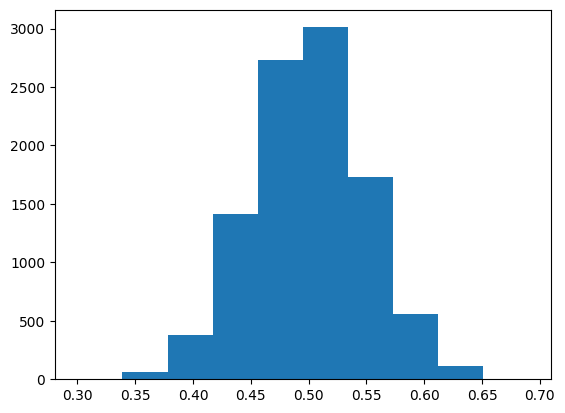

In [6]:
p = 0.4 # this is unknown

rng = np.random.RandomState(101) #15 for 40
data = rng.binomial(n=1, size=ntoss, p=p)
heads = data.sum()
print("Number of heads in sample: ", heads)

print(f"probability of getting {heads} heads or more: ", round(len(cnt[cnt >= heads])/nsamples*100,4) , "%")

plt.hist(sample.mean(axis=0));
print(
    "2.5th Percentile = " + str(np.percentile(sample.sum(axis=0), 2.5)) + " heads", 
    "97.5th Percentile = " + str(np.percentile(sample.sum(axis=0), 97.5)) + " heads"
    )

In [ ]:
print(f"probability of getting {heads} heads or more: ", round(len(cnt[cnt >= heads])/nsamples*100,4) , "%")
print(f"probability of getting {heads} heads or more: ", round(len(cnt[cnt <= heads])/nsamples*100,4) , "%")

In [ ]:
print("probability of getting 5 heads or more: ", round(len(cnt[cnt >= 5])/nsamples*100,2) , "%")

In [ ]:
ntoss = 100
nsamples = 1000

In [ ]:
data = rng.binomial(n=1, size=ntoss, p=p)
heads = data.sum()
print("Number of heads in sample: ", heads)

In [ ]:
sample = np.random.choice(pop, size=(ntoss,nsamples))

In [ ]:
cnt = sample.sum(axis=0)
cnt[:200]

In [ ]:
print(f"probability of getting {heads} heads or more: ", round(len(cnt[cnt >= heads])/nsamples*100,2) , "%")

In [ ]:
import scipy

In [ ]:
scipy.stats.binom.cdf(k=1, n=10, p=0.5)

In [ ]:
plt.hist(cnt)

## Issues

1. It does not tell you what the most likely answer is...
1. It does not tell you if p=0.5 is wrong, just unlikely. You can still get 9 heads with p=0.5. This is your false positive rate.

Note that what we've done above is not the true way to calculate the p-value as most statistical methods use formulas to calculate it vs simulations.


## Bayesian Approach

![https://xkcd.com/1132/](https://imgs.xkcd.com/comics/frequentists_vs_bayesians_2x.png)


https://www.sciencedirect.com/topics/neuroscience/statistical-inference

https://en.wikipedia.org/wiki/Frequentist_inference

https://www.redjournal.org/article/S0360-3016(21)03256-9/fulltext

https://corporatefinanceinstitute.com/resources/knowledge/other/hypothesis-testing/

http://sellsidehandbook.com/2018/12/09/statistical-inference-and-hypothesis-testing/

https://www.statisticshowto.com/frequentist-statistics/


Bayesian inference and Bayesian statistics in general is named after the statistician Thomas Bayes. 

In contrast to the frequentist method, Bayesian inference is focused on the probability that something is true. It begins with a measure of belief in a particular model or number, then with the addition of data, this belief is updated to reflect this new data. In my opinion, it is a more intuitive and natural method for incorporating the scientific method into the analytical process.


In [ ]:
# Let's start with defining H and 

# H = 1, T = 0

rng = np.random.RandomState(13)
data = rng.binomial(n=1, size=10, p=0.5)
data

In [ ]:
data.mean()

In [ ]:
a = []
for i in range(1, 10000):
  a.append(rng.binomial(n=1, size=i, p=0.5).mean())

In [ ]:
a = pd.Series(a)

fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(a)
ax.set_xlabel('Sample Size')
ax.set_ylabel('Estimation of P')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(a.index[::10], a[::10])
ax.set_xlabel('Sample Size (every tenth)')
ax.set_ylabel('Estimation of P')

In [ ]:
rng = np.random.default_rng(2000000)
coin = rng.binomial(1,0.5,10)

coin

H = np.arange(0,1.1,0.1)

T = np.flip(H)

P = np.array([1.]*len(H))

P *= T
plt.plot(P)

for c in coin:
    if c == 0:
        P *= T
    else:
        P*= H